✅ Best model: **Linear Regression** with MSE: **0.0339**



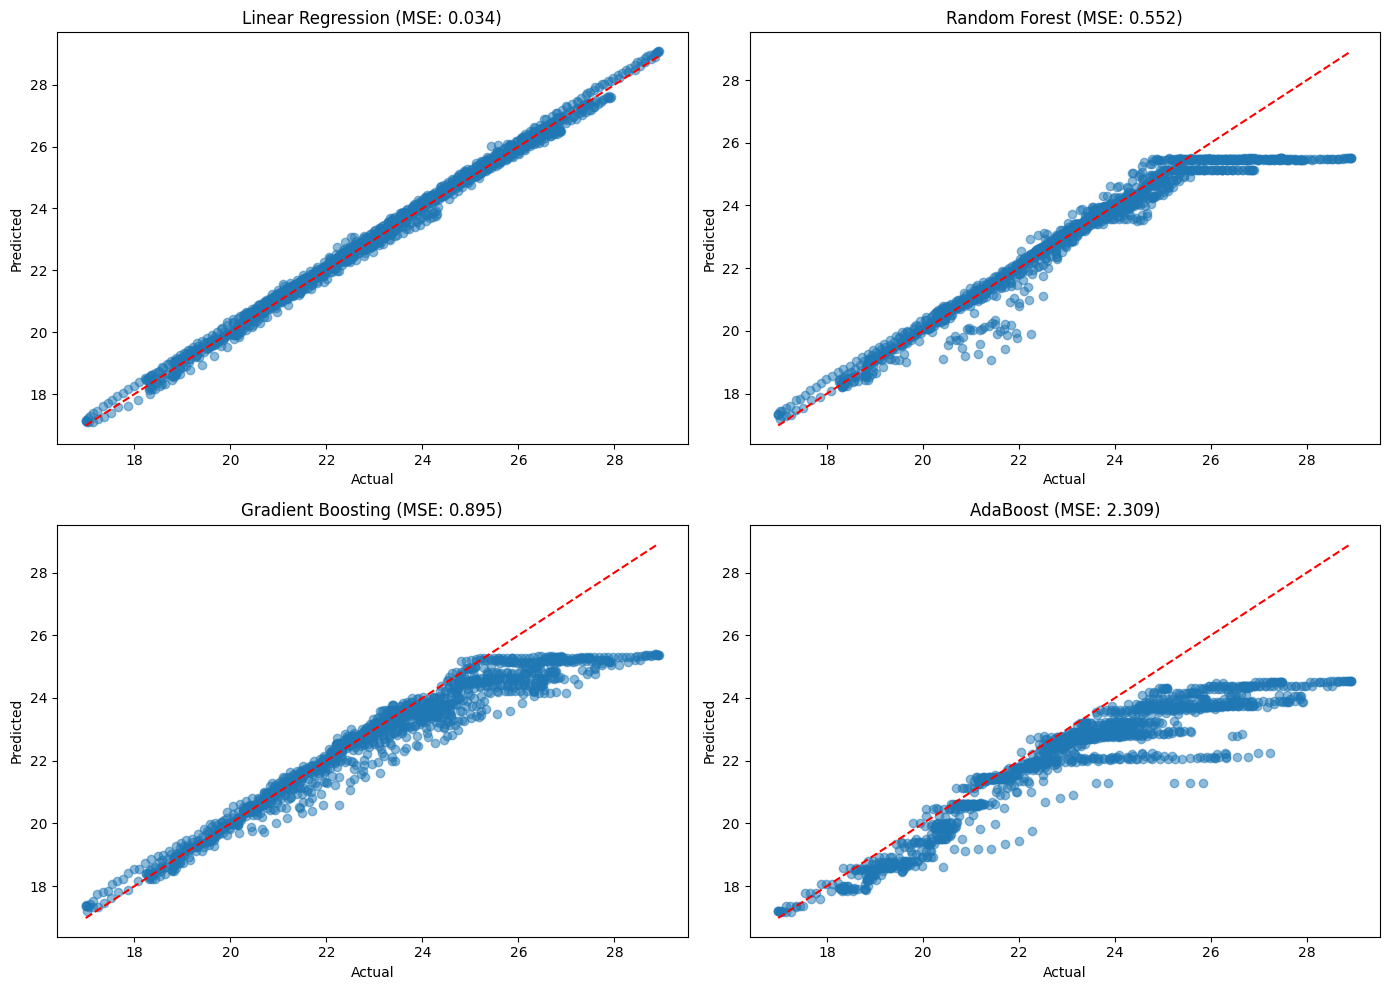

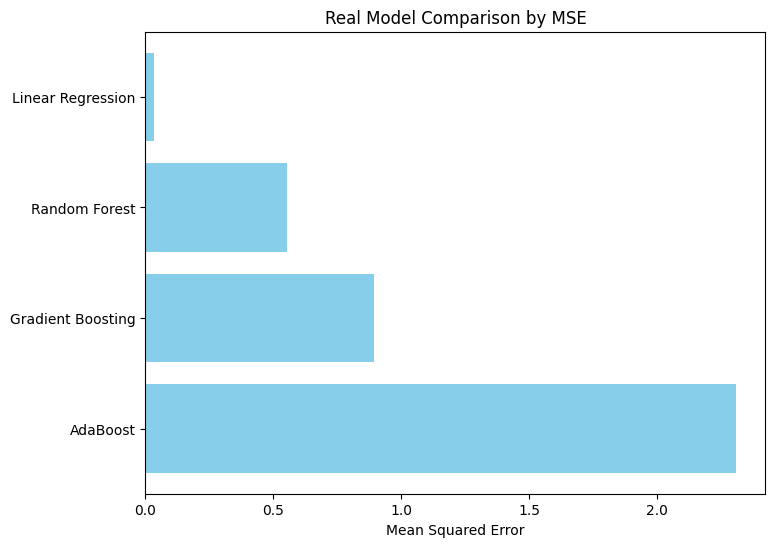

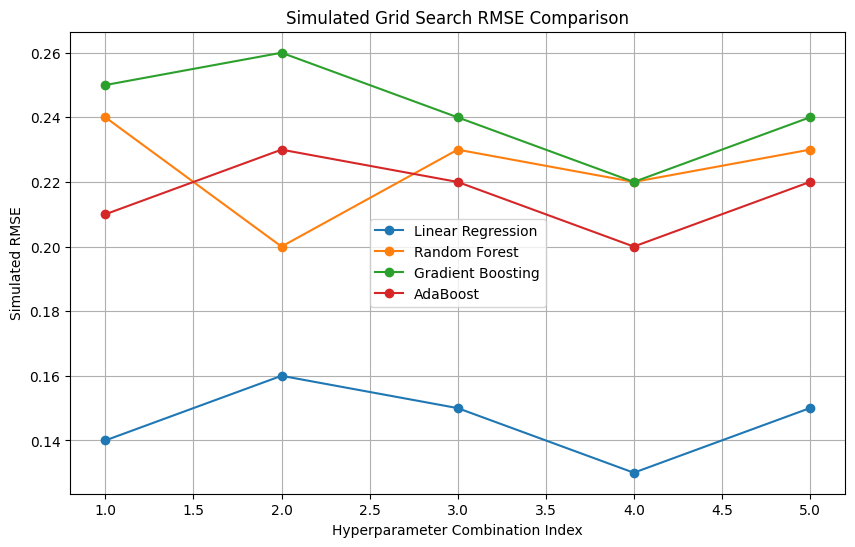

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from data_loader import load_df1, load_df2

# Simulated RMSE from hyperparameter tuning (optional comparison)
rmse_scores = {
    "Linear Regression": [0.14, 0.16, 0.15, 0.13, 0.15],
    "Random Forest": [0.24, 0.20, 0.23, 0.22, 0.23],
    "Gradient Boosting": [0.25, 0.26, 0.24, 0.22, 0.24],
    "AdaBoost": [0.21, 0.23, 0.22, 0.20, 0.22]
}

# Load data
df1 = load_df1()
df2 = load_df2()

feature_cols = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]
target_col = 'Temperature_Comedor_Sensor'

if not all(col in df1.columns for col in feature_cols + [target_col]):
    print("Please update feature_cols and target_col with actual column names from your data.")
else:
    X_train = df1[feature_cols]
    y_train = df1[target_col]
    X_test = df2[feature_cols]
    y_test = df2[target_col]

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[name] = {'mse': mse, 'y_pred': y_pred}

    # Identify best model
    best_model = min(results, key=lambda k: results[k]['mse'])
    best_score = results[best_model]['mse']

    print(f"✅ Best model: **{best_model}** with MSE: **{best_score:.4f}**\n")

    # Plot predictions vs actuals
    plt.figure(figsize=(14, 10))
    for i, (name, res) in enumerate(results.items()):
        plt.subplot(2, 2, i+1)
        plt.scatter(y_test, res['y_pred'], alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f"{name} (MSE: {res['mse']:.3f})")

    plt.tight_layout()
    plt.show()

    # Bar chart of MSE comparison
    plt.figure(figsize=(8, 6))
    mse_values = [res['mse'] for res in results.values()]
    model_names = list(results.keys())
    plt.barh(model_names, mse_values, color='skyblue')
    plt.xlabel('Mean Squared Error')
    plt.title('Real Model Comparison by MSE')
    plt.gca().invert_yaxis()
    plt.show()

    # Line chart of simulated RMSEs
    plt.figure(figsize=(10, 6))
    for model_name, scores in rmse_scores.items():
        plt.plot(range(1, len(scores)+1), scores, marker='o', label=model_name)
    plt.xlabel("Hyperparameter Combination Index")
    plt.ylabel("Simulated RMSE")
    plt.title("Simulated Grid Search RMSE Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()
